# Regression - 回归模型


*Supervised* machine learning techniques involve training a model to operate on a set of *features* and predict a *label* using a dataset that includes some already-known label values. The training process *fits* the features to the known labels to define a general function that can be applied to new features for which the labels are unknown, and predict them. You can think of this function like this, in which ***y*** represents the label we want to predict and ***x*** represents the features the model uses to predict it.

> *Supervised* machine learning 监督学习   
> feature 特征   
> label 标签

有监督的机器学习技术包括训练一个模型来操作一组 *feature*，并使用一个包含一些已知 *label* 值的数据集来预测一个 *label*。训练过程将 *feature* 与已知 *label* 相匹配，以定义一个通用函数，该函数可应用于 *label* 未知的新 *feature*，并对其进行预测。你可以这样想这个函数，***y***代表我们想要预测的 *label*，***x***代表模型用来预测它的 *feature*。

$$y = f(x)$$



In most cases, *x* is actually a *vector* that consists of multiple feature values, so to be a little more precise, the function could be expressed like this:

在大多数情况下，*x* 实际上是一个由多个特征值组成的 *vector*，所以更精确一点，函数可以这样表示：

$$y = f([x_1, x_2, x_3, ...])$$



The goal of training the model is to find a function that performs some kind of calculation to the *x* values that produces the result *y*. We do this by applying a machine learning *algorithm* that tries to fit the *x* values to a calculation that produces *y* reasonably accurately for all of the cases in the training dataset.

训练模型的目标是找到一个函数，该函数对 *x* 值执行某种计算，从而生成结果 *y*。我们通过应用机器学习 *算法* 来实现这一点，该算法尝试将 *x* 值拟合到计算中，从而为训练数据集中的所有情况合理准确地生成 *y*。

There are lots of machine learning algorithms for supervised learning, and they can be broadly divided into two types:

监督学习的机器学习算法有很多种，大致可以分为两类：

- **_Regression_ algorithms**: Algorithms that predict a *y* value that is a numeric value, such as the price of a house or the number of sales transactions.
- **回归算法**：预测一个 *y* 值的算法，该值是一个数值，例如房价或销售交易的数量。

- **_Classification_ algorithms**: Algorithms that predict to which category, or *class*, an observation belongs. The *y* value in a classification model is a vector of probability values between 0 and 1, one for each class, indicating the probability of the observation belonging to each class.
- **分类算法**：预测观测值属于哪个类别或 *类* 的算法。分类模型中的 *y* 值是介于 0 和 1 之间的概率值向量，每个类一个，表示属于每个类的观测的概率。

In this notebook, we'll focus on *regression*, using an example based on a real study in which data for a bicycle sharing scheme was collected and used to predict the number of rentals based on seasonality and weather conditions. We'll use a simplified version of the dataset from that study.

在本笔记本中，我们将重点讨论 *回归*，使用一个基于真实研究的示例，其中收集了自行车共享计划的数据，并根据季节性和天气条件预测租赁数量。我们将使用该研究数据集的简化版本。


> **Citation**: The data used in this exercise is derived from [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) and is used in accordance with the published [license agreement](https://www.capitalbikeshare.com/data-license-agreement).

> **引文**：本练习中使用的数据来源于[Capital Bikeshare](https://www.capitalbikeshare.com/system-data)并按照公布的[许可协议](https://www.capitalbikeshare.com/data-license-agreement)使用.

## Explore the Data - 获取及预处理数据

The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the *features* and the *label* your model will try to predict. This may require some work to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values), deriving new feature columns by transforming or combining existing features (a process known as *feature engineering*), *normalizing* numeric features (values you can measure or count) so they're on a similar scale, and *encoding* categorical features (values that represent discrete categories) as numeric indicators.

任何机器学习项目的第一步都是探索将用于训练模型的数据。这一探索的目的是试图理解其属性之间的关系；特别是，您的模型将尝试预测 *特征* 和 *标签* 之间的任何明显相关性。这可能需要一些工作来检测和修复数据中的问题(例如处理缺失值、错误或异常值)，通过转换或组合现有特征导出新的特征列(该过程称为“特征工程”) ， *规范化* 数字特征(可以测量或计算的值) ，使它们处于相似的比例，以及 *编码* 分类特征(表示离散类别的值) 作为数字指示符。

> outlier -> a number that is a lot higher or lower than all the other numbers in a set of numbers that represent facts or measurements   
  In the set {3,5, 4,6, 2,25,5, 6}, 25 is an outlier

Let's start by loading the bicycle sharing data as a **Pandas** DataFrame and viewing the first few rows.

让我们从加载自行车共享数据作为 **Pandas** 数据帧开始，并查看前几行。

In [1]:
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:

- **instant**: A unique row identifier    
  唯一行标识符      
- **dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.    
  观察数据的日期 - 在这种情况下，每天收集数据；所以每个日期都有一行数据。    
- **season**: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)      
  表示季节的数字编码值(1:春季，2:夏季，3:秋季，4:冬季)        
- **yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)    
  进行观察的研究年份(研究历时两年-第0年代表2011年，第1年代表2012年)          
- **mnth**: The calendar month in which the observation was made (1:January ... 12:December)     
  进行观察的日历月(1:1月 ... 12:12月)           
- **holiday**: A binary value indicating whether or not the observation was made on a public holiday)       
  表示是否在公共假日进行观察的二进制值)     
- **weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)    
  进行观察的一周中的某一天(0:周日 ... 6:周六)      
- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)    
  一个二进制值，指示该天是否为工作日(不是周末或假日)      
- **weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)    
  表示天气状况的分类值(1:晴朗，2:雾/云，3:小雨/雪，4:大雨/冰雹/雪/雾) 
- **temp**: The temperature in celsius (normalized)       
  以摄氏度为单位的温度(标准化)         
- **atemp**: The apparent ("feels-like") temperature in celsius (normalized)             
  表观(“体感”) 温度，单位为摄氏度(标准化)          
- **hum**: The humidity level (normalized)        
  湿度水平(标准化)          
- **windspeed**: The windspeed (normalized)       
  风速(标准化)     
- **rentals**: The number of bicycle rentals recorded.       
  记录的自行车租赁数量。     
In this dataset, **rentals** represents the label (the *y* value) our model must be trained to predict. The other columns are potential features (*x* values).          
在这个数据集中，**rentals** 代表我们的模型必须经过训练才能预测的标签(*y*值) 。其他列是潜在特征(*x*值) 。   

As mentioned previously, you can perform some *feature engineering* to combine or derive new features. For example, let's add a new column named **day** to the dataframe by extracting the day component from the existing **dteday** column. The new column represents the day of the month from 1 to 31.       
如前所述，您可以执行一些*特性工程*来组合或获取新特性。例如，让我们通过从现有的 **dteday** 列中提取 day 成分，将名为 **day** 的新列添加到 DataFrame 中。新列表示从 1 到 31 的每月中的第几天。

In [2]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


OK, let's start our analysis of the data by examining a few key descriptive statistics. We can use the dataframe's **describe** method to generate these for the numeric features as well as the **rentals** label column.   
好的，让我们通过审查一些关键的描述性统计数据来开始对数据的分析。我们可以使用 dataframe 的 **describe** 方法为数字特征以及 **rentals** 标签列生成这些。

In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


- [describe文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)
- `DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)`      
  生成描述性统计数据  
> DataFrame.count - Count number of non-NA/null observations.     
  DataFrame.max - Maximum of the values in the object.     
  DataFrame.min - Minimum of the values in the object.   
  DataFrame.mean - Mean of the values.    
  DataFrame.std - Standard deviation of the observations.  观测值的标准差     
  DataFrame.select_dtypes - Subset of a DataFrame including/excluding columns based on their dtype.    
  DataFrame 的子集，包括/排除 基于数据类型的列

- 示例  
  ```python
  s = pd.Series([1, 2, 3])
  s.describe()
  count    3.0
  mean     2.0
  std      1.0
  min      1.0
  25%      1.5
  50%      2.0
  75%      2.5
  max      3.0
  dtype: float64
  ```


The statistics reveal some information about the distribution of the data in each of the numeric fields, including the number of observations (there are 731 records), the mean, standard deviation, minimum and maximum values, and the quartile values (the threshold values for 25%, 50% - which is also the median, and 75% of the data). From this, we can see that the mean number of daily rentals is around 848; but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day.

统计数据揭示了每个数字字段中数据分布的一些信息，包括观察次数(共731条记录) 、平均值、标准差、最小值和最大值以及四分位数值(25%的阈值、50%的阈值也是数据的中位数和75%) 。由此可以看出，日租的平均数在 848 左右；但是有一个比较大的标准差，表明每天租房的数量有很大的差异。

We might get a clearer idea of the distribution of rentals values by visualizing the data. Common plot types for visualizing numeric data distributions are *histograms* and *box plots*, so let's use Python's **matplotlib** library to create one of each of these for the **rentals** column.

通过可视化数据，我们可以更清楚地了解租金值的分布。用于可视化数值数据分布的常见绘图类型是 *直方图* 和 *方框图*，因此让我们使用Python的 **matplotlib** 库为 **rentals** 列创建其中的每种类型。

> 箱形图(Box-plot) 又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。因形状如箱子而得名。

<ipython-input-4-8895798f52da>:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


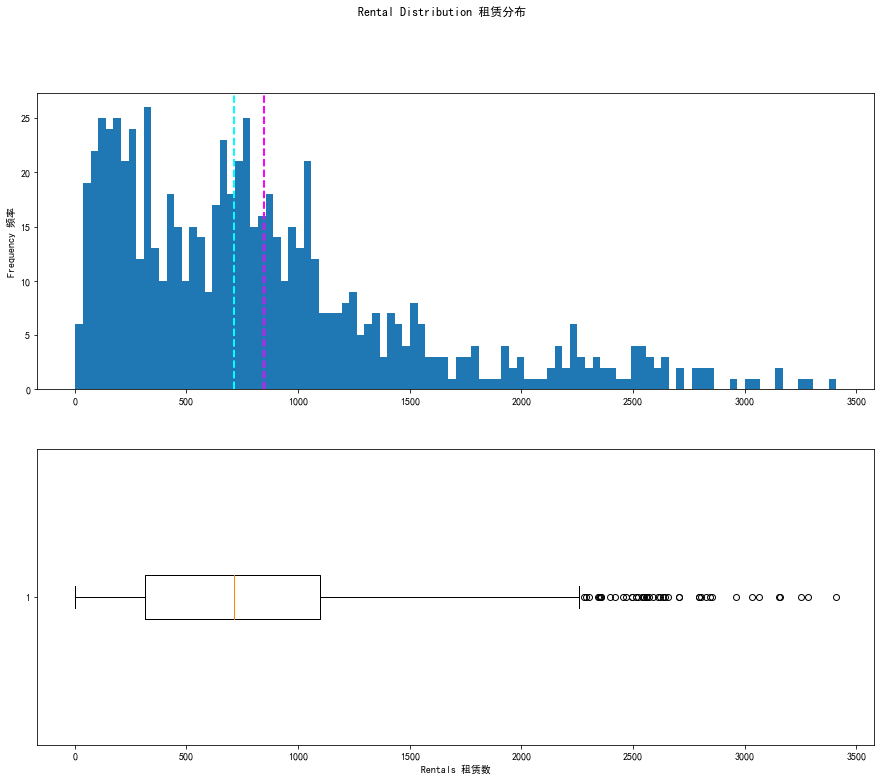

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 使用黑体
plt.rcParams['font.family'] = ['SimHei']

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (15,12))


# Plot the histogram   
ax[0].hist(label, bins=100)     # 柱子数为 100(不是指实际柱子数,而是指整个数据区间等分为 100 个柱子)
ax[0].set_ylabel('Frequency 频率')

# Add lines for the mean, median, and mode
# 在轴上添加一条垂直线, 垂直坐标为 label 的平均值, 颜色为品红, 线条样式为虚线, 线宽为 2 磅
ax[0].axvline(label.mean(), color='magenta', linestyle='--', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)    # vert=False 生成横向的箱形图
ax[1].set_xlabel('Rentals 租赁数')

# Add a title to the Figure
fig.suptitle('Rental Distribution 租赁分布')

# Show the figure
fig.show()


`set_linestyle(ls)`
  - ls: '-', '--', '-.', ':', '', ' '(偏移量、开/关顺序), ...
  - 可能的值    
    |        线条样式         |       描述       |
    | :---------------------: | :--------------: |
    |    '-'` or `'solid'     |       实线       |
    |   '--'` or `'dashed'    |  虚线(-------)   |
    |   '-.'` or `'dashdot'   |  虚线(-.-.-.-.)  |
    |    ':'` or `'dotted'    |   虚线(......)   |
    | 'None'` or `' '` or `'' | 一无所获(不画线) |

箱型图(BoxPlot): 又称为盒须图、盒式图、盒状图或箱线图，是一种用作显示一组数据分散情况资料的统计图。因型状如箱子而得名  

[箱型图百度百科](https://baike.baidu.com/item/%E7%AE%B1%E5%BD%A2%E5%9B%BE/10671164)

箱形图提供了一种只用5个点对数据集做简单总结的方式。这5个点包括中点、Q1、Q3、分部状态的高位和低位。箱形图很形象的分为中心、延伸以及分布状态的全部范围。

![20210720091654](http://cdn.ayusummer233.top/img/20210720091654.png)

> 四分位数(Quartile) 也称四分位点，是指在统计学中把所有数值由小到大排列并分成四等份，处于三个分割点位置的数值。

`DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds)`
- 当指定 return_type=‘dict’ 时，其结果值为一个字典，字典索引为固定的 'whiskers'、'caps'、'boxes'、'fliers'、'means'
- column，默认为 None，输入为 str 或由 str 构成的 list,其作用是指定要进行箱型图分析的列
- by，默认为None，str or array-like，其作用为pandas的group by，通过指定by=‘columns’，可进行多组合箱型图分析
- ax，matplotlib.axes.Axes的对象，没有太大作用
- fontsize，箱型图坐标轴字体大小
- rot，箱型图坐标轴旋转角度
- grid，箱型图网格线是否显示
- figsize，箱型图窗口尺寸大小
- layout，必须配合by 一起使用，类似于subplot 的画布分区域功能
- return_type，指定返回对象的类型，默认为None,可输入的参数为‘axes’,‘dict’,‘both’，当与by一起使用是，返回的对象为Series或array(for return_type = None)

> [DataFrame.boxplot英文文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)     
> [pandas 箱型图(boxplot)详解_walking_visitor的博客-CSDN博客_boxplot](https://blog.csdn.net/walking_visitor/article/details/83109846)

---------

The plots show that the number of daily rentals ranges from 0 to just over 3,400. However, the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 0 and around 2,200 rentals. The few values above this are shown in the box plot as small circles, indicating that they are *outliers* - in other words, unusually high or low values beyond the typical range of most of the data.

这些图显示，日租的数量从 0 到 3400 多个不等。然而，日租数的平均(和中位数) 数量更接近该范围的低端，大多数数据在 0 到 2200 之间。     
其余的一些值在箱形图中显示为小圆圈，表示它们是 *异常值* - 换句话说，高/低于大多数数据典型范围的异常数值。

We can do the same kind of visual exploration of the numeric features. Let's create a histogram for each of these.

我们可以对数字特征进行同样的可视化探索。让我们为每一列数据创建一个直方图。

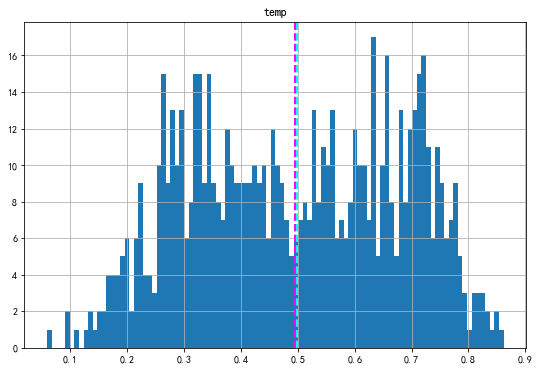

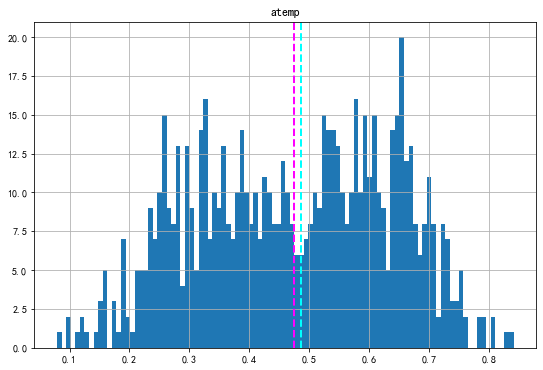

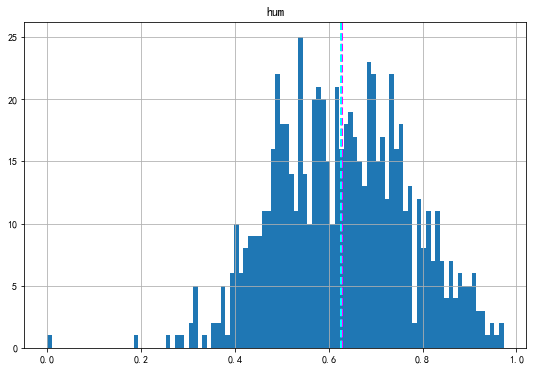

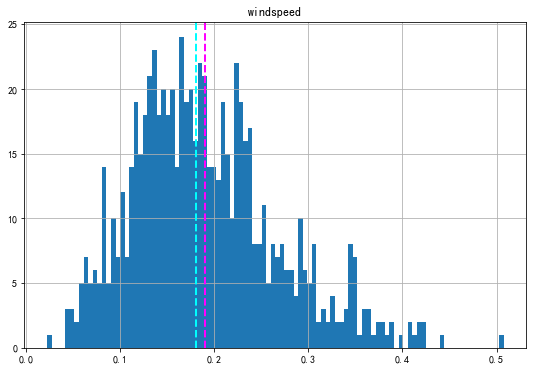

In [5]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

`pyplot.gca()`    
[python matplotlib.pyplot.gca() 函数的作用(获得当前的Axes对象【Get Current Axes】) _Dontla的博客-CSDN博客](https://blog.csdn.net/Dontla/article/details/98327176)     
[matplotlib绘图——再谈axes和pyplot方法 - FINTHON](https://finthon.com/matplotlib-axes-pyplot/)   

当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示Get Current Figure和Get Current Axes。在 pyplot 模块中，许多函数都是对当前的 Figure 或 Axes 对象进行处理，比如说：plt.plot() 实际上会通过 plt.gca() 获得当前的 Axes 对象 ax，然后再调用 ax.plot() 方法实现真正的绘图。    

在 matplotlib 绘图过程中，经常会出现 axes 绘图和 pyplot 绘图这两种方法，但是如果不搞清楚它们的区别，往往会得不到你想要的图形。所谓 axes 绘图是指调用 axes 对象(坐标轴对象) 去完成绘图任务，而 pyplot 绘图就是常规的简单绘图方式。在绘制多个子图的时候，往往需要指定在哪个子图进行绘图，axes和pyplot的使用跟你选择的绘制子图的方法有关。

subplots 方法:  
subplots方法可以一次性绘制几个子图，代码如下：



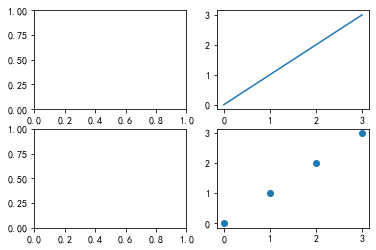

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
fig, axes = plt.subplots(2, 2)
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
 
ax2.plot(np.arange(4))
plt.scatter(np.arange(4), np.arange(4))
plt.show()

通过 subplots 方法得到画布 fig 和一个包含所有字坐标轴的数组 axes。使用切片方法能够获得里面的每个子坐标轴。接下来调用相应坐标轴的 plot 方法，在 ax2 坐标轴绘制了直线图；如果直接使用 plt.scatter ，我们会发现在最后一个子图中绘制了散点图，这就是区别，plt 方法默认是在最后一个建立的坐标轴上绘图。

> 相应的, 如果不用 axes 绘制子图的话也可以使用 subplot(2,2,1) subplot(2,2,2) .... 然后调用 plt.plot() plot.scatter() ... 来一个个绘制子图     

The numeric features seem to be more *normally* distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are.

数值特征似乎更服从正态分布，平均值和中位数更接近数值范围的中间值，与最常出现的值的位置一致。

> **Note**: The distributions are not truly *normal* in the statistical sense, which would result in a smooth, symmetric "bell-curve" histogram with the mean and mode (the most common value) in the center; but they do generally indicate that most of the observations have a value somewhere near the middle.

> **注**：在统计意义上，分布不是真正的*正态*，这将导致平滑、对称的“钟形曲线”直方图，平均值和模式(最常见的值) 位于中心；但它们通常表明，大多数观测值都在中间附近。

We've explored the distribution of the numeric values in the dataset, but what about the categorical features? These aren't continuous numbers on a scale, so we can't use histograms; but we can plot a bar chart showing the count of each discrete value for each category.

我们已经研究了数据集中数值的分布，但是分类特征呢？这些不是连续的数字，所以我们不能使用直方图；但我们可以绘制一个条形图，显示每个类别的每个离散值的计数。

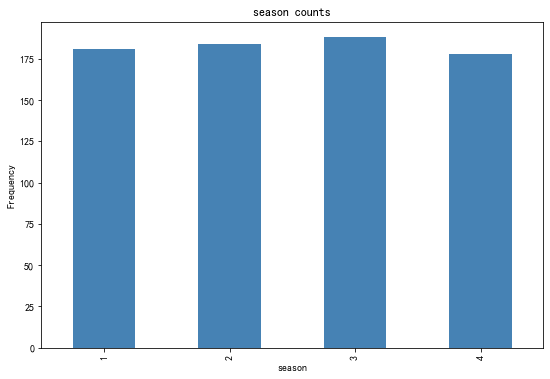

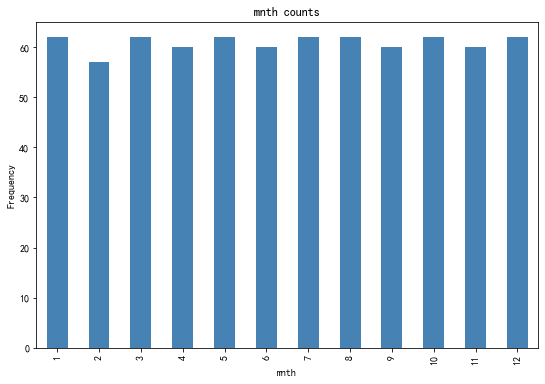

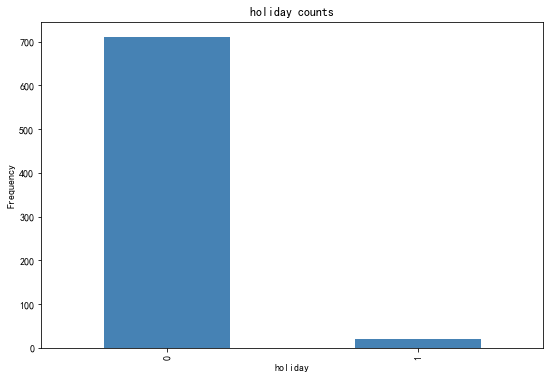

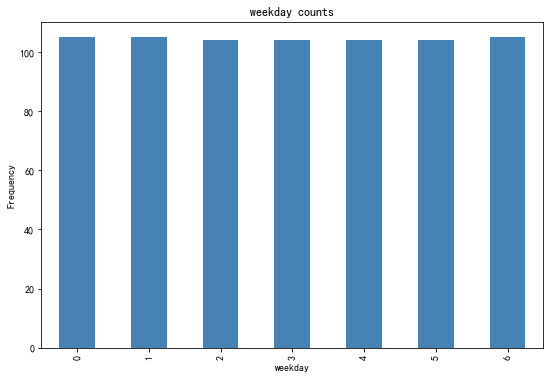

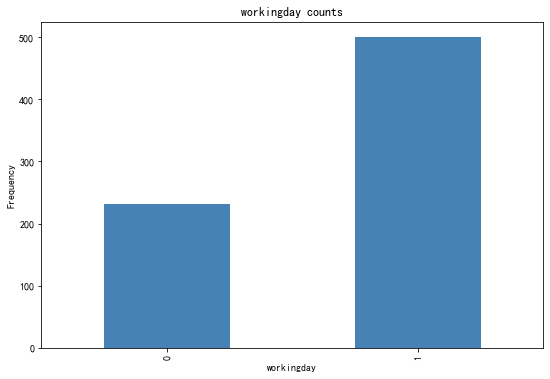

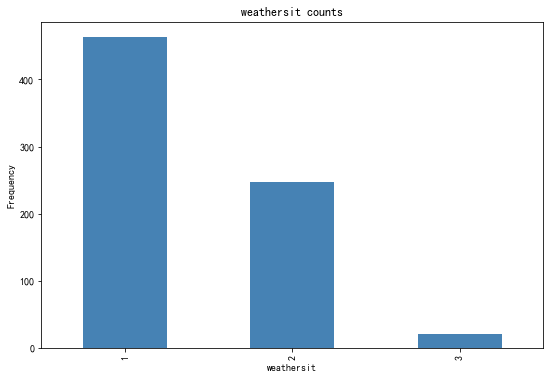

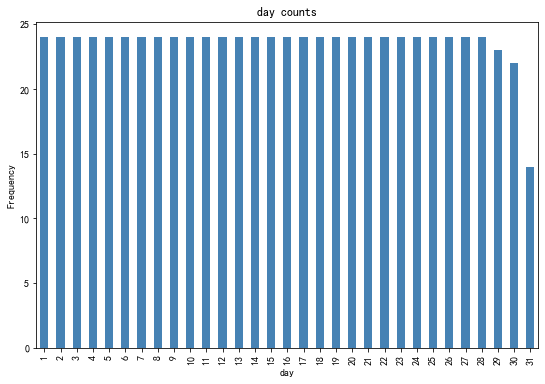

In [7]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


Many of the categorical features show a more or less *uniform* distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

许多分类特征显示出或多或少的*均匀*分布(意味着每个分类的行数大致相同) 。例外情况包括：

- **holiday**: There are many fewer days that are holidays than days that aren't.        
  **假日**：有假日的日子比没有假日的日子少得多。
- **workingday**: There are more working days than non-working days.       
  **工作日**：工作日多于非工作日。
- **weathersit**: Most days are category *1* (clear), with category *2* (mist and cloud) the next most common. There are comparatively few category *3* (light rain or snow) days, and no category *4* (heavy rain, hail, or fog) days at all.     
  **天气状况**：大多数日子都是*1*(晴天) ，其次是*2*(雾和云) 。相对较少的类别是*3*(小雨或雪) 天，完全没有是类别*4*(大雨、冰雹或雾) 天。

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the **rentals** label we want to be able to predict.   

现在我们已经了解了一些列中数据的分布情况，我们可以开始寻找特性和我们希望能够预测的 **rentals** 标签之间的关系。

For the numeric features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the *correlation* statistic to quantify the apparent relationship.. 

对于数字特征，我们可以创建散点图来显示特征值和标签值的交点。我们还可以计算 *相关* 统计来量化明显的关系。。

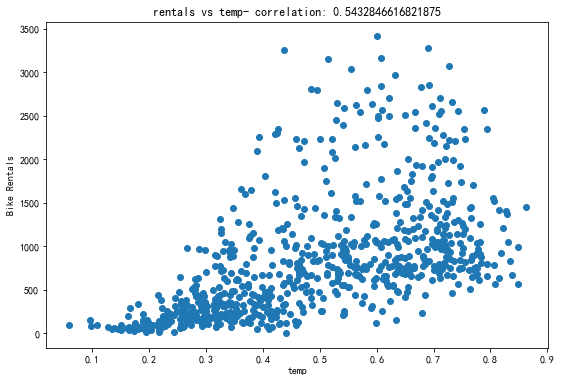

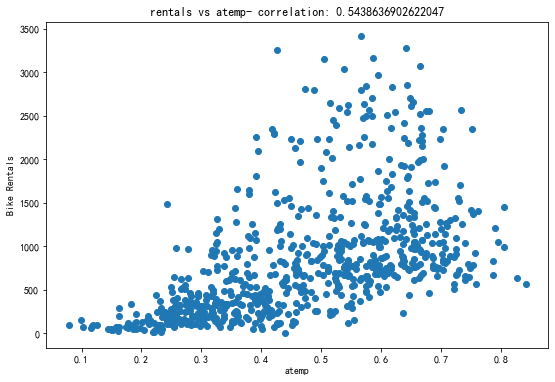

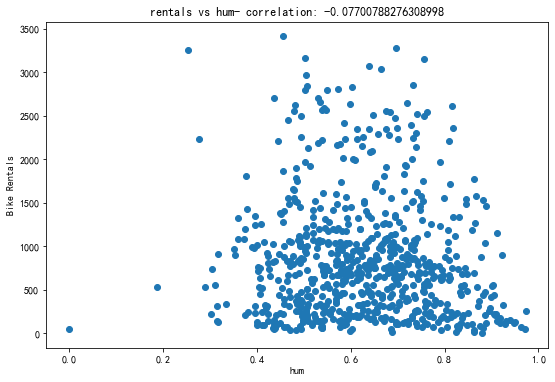

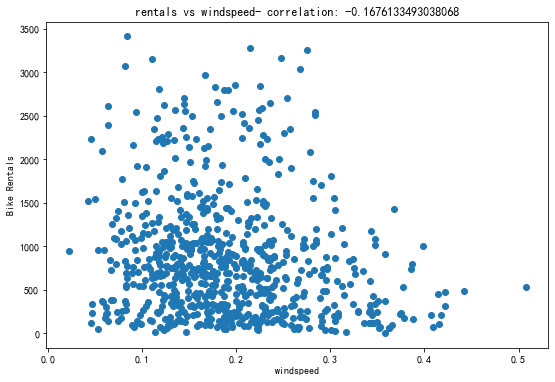

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


`Pearson` 相关系数
> [Pearson(皮尔逊)相关系数_Leaveager的博客-CSDN博客_皮尔逊相关系数](https://blog.csdn.net/qq_30142403/article/details/82350628)

`相关系数`: 考量两个变量之间的相关程度(线性相关), 其值介于 -1 与 1 之间   

若有两个变量 X 和 Y, 最终计算出的相关系数 corr 的含义可以有如下理解:
- corr == 0: X 与 Y 无关
- corr ∈ (0, 1]: 两个变量为正相关
- corr ∈ [-1, 0): 两个变量为负相关

相关系数的绝对值越大，相关性越强，相关系数越接近于 1 或 -1，相关度越强，相关系数越接近于 0，相关度越弱。     
通常情况下通过以下取值范围判断变量的相关强度：

|  范围   |      相关性      |
| :-----: | :--------------: |
| 0.8-1.0 |     极强相关     |
| 0.6-0.8 |      强相关      |
| 0.4-0.6 |   中等程度相关   |
| 0.2-0.4 |      弱相关      |
| 0.0-0.2 | 极弱相关或无相关 |


-------------

The results aren't conclusive, but if you look closely at the scatter plots for **temp** and **atemp**, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. Conversely, the plots for **hum** and **windspeed** show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

结果并不是决定性的，但如果你仔细观察 **temp(温度)** 和 **atemp(体感温度)** 的散点图，你会发现一个模糊的对角线趋势，表明较高的租车数量往往与较高的温度相吻合；这两个特征的相关值都略高于0.5，这支持了这一观察结果。相反，**hum(湿度)** 和 **windspeed(风速)**的图显示出轻微的负相关，表明在高湿度或风速的日子租车数量较少。

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of rental counts for each category.

现在让我们将分类特征与标签进行比较。我们将通过创建显示每个类别的租车计数分布的箱形图来实现这一点。

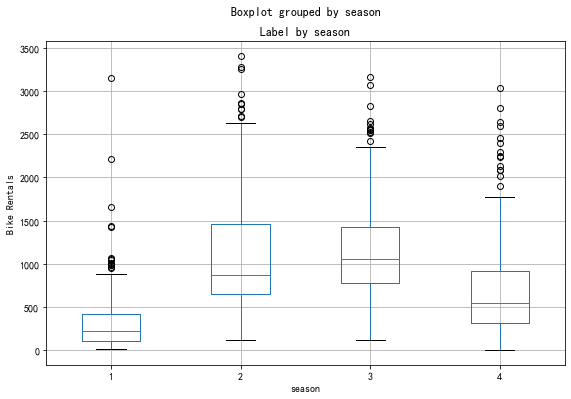

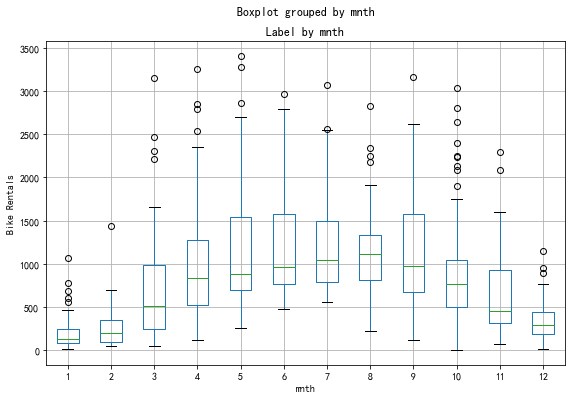

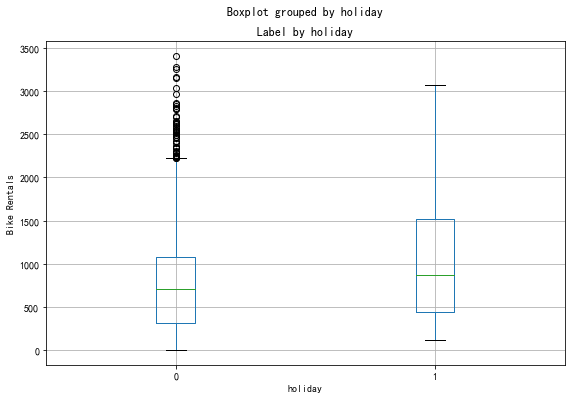

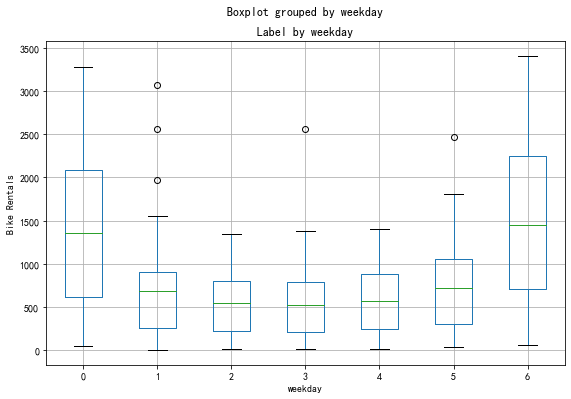

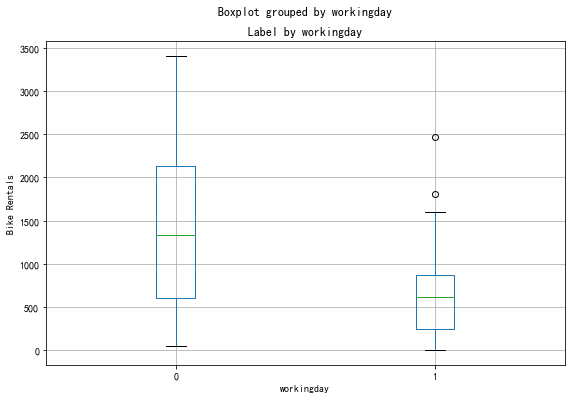

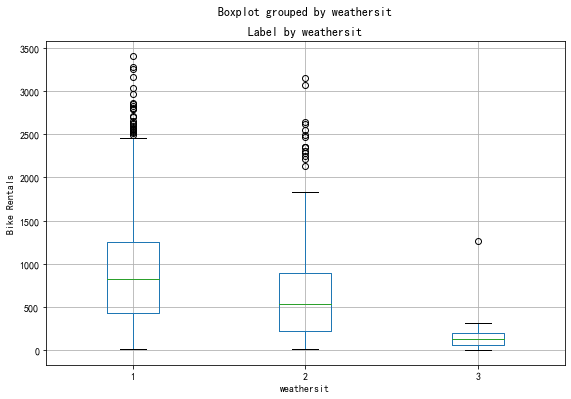

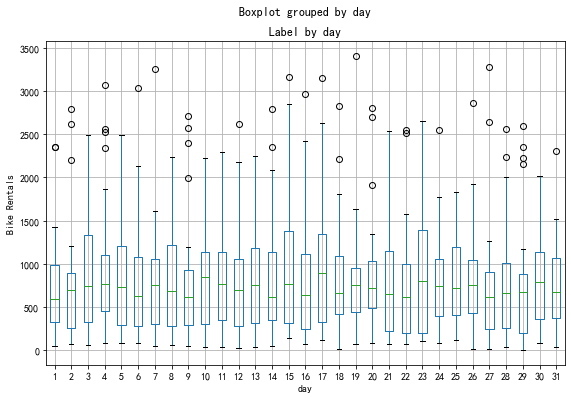

In [9]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

The plots show some variance in the relationship between some category values and rentals. For example, there's a clear difference in the distribution of rentals on weekends (**weekday** 0 or 6) and those during the working week (**weekday** 1 to 5). Similarly, there are notable differences for **holiday** and **workingday** categories. There's a noticeable trend that shows different rental distributions in summer and fall months compared to spring and winter months. The **weathersit** category also seems to make a difference in rental distribution. The **day** feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals.

图中显示了一些类别值和租车数之间的关系存在差异。例如，周末(**weekday**0或6) 和工作周(**weekday**1至5) 的租金分布有明显差异。同样的，**holiday**和**workingday**类别也存在显著差异。与春季和冬季相比，夏季和秋季的租金分布有明显的不同趋势。**weathersit**category似乎也对租金分配产生了影响。我们为一个月中的某一天创建的**日**功能几乎没有变化，这表明它可能无法预测租金的数量。

## 训练一个回归模型 - Train a Regression Model  

Now that we've explored the data, it's time to use it to train a regression model that uses the features we've identified as potentially predictive to predict the **rentals** label.  The first thing we need to do is to separate the features we want to use to train the model from the label we want it to predict.

既然我们已经研究了数据，现在是时候用它来训练一个回归模型，该模型使用我们已经确定的潜在预测特征来预测**rentals**标签了。我们需要做的第一件事是将我们想要用来训练模型的特性与我们想要它预测的标签分开。

In [10]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.

在分离数据集之后，我们现在有了名为**X**的numpy数组，其中包含特征，**y**中包含标签。

We *could* train a model using all of the data; but it's common practice in supervised learning to split the data into two subsets; a (typically larger) set with which to train the model, and a smaller "hold-back" set with which to validate the trained model. This enables us to evaluate how well the model performs when used with the validation dataset by comparing the predicted labels to the known labels. It's important to split the data *randomly* (rather than say, taking the first 70% of the data for training and keeping the rest for validation). This helps ensure that the two subsets of data are statistically comparable (so we validate the model with data that has a similar statistical distribution to the data on which it was trained).

我们可以用所有的数据来训练模型；但在监督学习中，通常的做法是将数据分成两个子集；一个用来训练模型的集合(通常较大) ，以及一个用来验证训练模型的较小的“抑制”集合。这使我们能够通过比较预测标签和已知标签来评估模型在与验证数据集一起使用时的性能。将数据*随机*分割很重要(而不是说，将前70%的数据用于训练，并保留其余数据用于验证) 。这有助于确保这两组数据在统计上具有可比性(因此，我们使用与训练数据具有相似统计分布的数据来验证模型) 。

To randomly split the data, we'll use the **train_test_split** function in the **scikit-learn** library. This library is one of the most widely used machine learning packages for Python.

为了随机分割数据，我们将使用 **scikit-learn** 库中的 **train_test_split** 函数。这个库是 Python 中使用最广泛的机器学习包之一。

In [11]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


- [sklearn的train_test_split()各函数参数含义解释(非常全)  - The-Chosen-One - 博客园 (cnblogs.com)](https://www.cnblogs.com/Yanjy-OnlyOne/p/11288098.html)
- `random_state`：随机数种子, 其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。

Now we have the following four datasets:

现在我们有以下四个数据集:

- **X_train**: The feature values we'll use to train the model    
            我们将用来训练模型的特征值
- **y_train**: The corresponding labels we'll use to train the model       
   我们将用来训练模型的相应标签   
- **X_test**: The feature values we'll use to validate the model      
  我们将用来验证模型的特征值
- **y_test**: The corresponding labels we'll use to validate the model     
  我们将用来验证模型的相应标签

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. We'll use a *linear regression* algorithm, a common starting point for regression that works by trying to find a linear relationship between the *X* values and the *y* label. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

现在，我们准备通过对训练数据拟合合适的回归算法来训练模型。我们将使用一个 *线性回归* 算法，这是一个常见的回归起点，它的工作原理是试图找到 *X* 值和 *y* 标签之间的线性关系。得到的模型是一个函数，它在概念上定义了一条线，其中每个可能的 X 和 y 值组合相交。
 
In Scikit-Learn, training algorithms are encapsulated in *estimators*, and in this case we'll use the **LinearRegression** estimator to train a linear regression model.

在 Scikit-Learn中，训练算法封装在 *估计器* 中，在本例中，我们将使用 **线性回归* *估计器来训练线性回归模型。

In [12]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### 评估训练模型-Evaluate the Trained Model

Now that we've trained the model, we can use it to predict rental counts for the features we held back in our validation dataset. Then we can compare these predictions to the actual label values to evaluate how well (or not!) the model is working.

既然我们已经训练了模型，我们就可以用它来预测我们在验证数据集中保留的特性的出租数量。然后我们可以将这些预测与实际的标签值进行比较，以评估这个模型多好(或坏)。

In [13]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

将每个预测与其对应的 “基本事实” 实际值进行比较，并不是一种确定模型预测效果的非常有效的方法。让我们看看，我们能否通过可视化散点图比较预测和实际标签来得到一个更好的提示。我们还将铺一条趋势线，以便大致了解预测标签与真实标签的对齐程度。

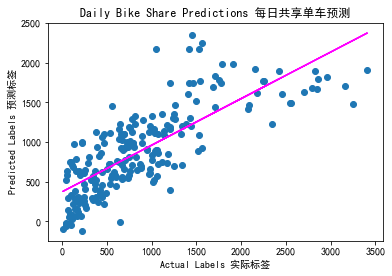

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels 实际标签')
plt.ylabel('Predicted Labels 预测标签')
plt.title('Daily Bike Share Predictions 每日共享单车预测')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)  # 1 阶
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

- [numpy中的polyfit_才疏学浅的ksks14的博客-CSDN博客_numpy polyfit](https://blog.csdn.net/qq_45804132/article/details/104744632)
- `polyfit`: polyfit 函数是 numpy 中常用于进行曲线拟合的函数, 通常与 poly1d 一起使用
- poly1d 函数可以根据传入的直线或者曲线的参数生成方程，而且这里的直线或者曲线参数就是由 polyfit 提供的。

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the *residuals* of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of *error* when the model is used with new data for which the label is unknown.

上图有明确的对角线趋势，预测值和实际值的交点一般沿着趋势线的路径；但是直线所代表的理想函数和结果之间有相当大的差别。此方差表示模型的 *残差* --- 换句话说，当模型将其在训练期间学习到的系数应用于验证数据时预测的标签与验证标签的实际值之间的差异。当从验证数据中评估这些残差时，表明当模型与标签未知的新数据一起使用时，*误差*的预期水平。

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

您可以通过计算一些常用的评估指标来量化残差。我们将重点关注以下三点：

- **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model        
  **均方误差(MSE)**: 预测值和实际值之间的平方差的平均值。这将产生一个相对度量，其中值越小，模型的拟合越好
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)    
  **均方根误差(RMSE)**: MSE 的平方根。这将产生一个与标签相同单位的绝对度量(在本例中是租车数) 。值越小，模型越好(在简单意义上，它代表了预测错误的平均租车数！) 
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>**): A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.    
  **决定系数**: 一种相对度量，其中值越高，模型拟合越好。本质上，该度量表示模型能够解释的预测和实际标签值之间的差异。

> **Note**: You can find out more about these and other metrics for evaluating regression models in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.    

让我们使用 Scikit-learn 根据为验证数据生成的预测值来计算模型的这些度量。

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2: 0.6040454736919191


So now we've quantified the ability of our model to predict the number of rentals. It definitely has *some* predictive power, but we can probably do better!

所以现在我们已经量化了我们的模型预测租车数量的能力。它确实有一些预测能力，但我们可能做得更好！

## 总结 - Summary

Here we've explored our data and fit a basic regression model. In the next notebook, we will try a number of other regression algorithms to improve performance

在这里，我们探索了我们的数据，并拟合了一个基本的回归模型。在下一个笔记本中，我们将尝试其他一些回归算法来提高性能

## 进一步阅读 - Further Reading
To learn more about Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).